In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
import math


In [110]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [111]:
 fraud_data = pd.read_csv('fraud_oracle(consolidated sheets, deleted NANS).csv')
fraud_data = fraud_data.dropna()
Y = fraud_data["FraudFound_P"]
X = fraud_data.drop('FraudFound_P', axis=1)


In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)




5985     0.0
8210     0.0
13223    0.0
443      0.0
8114     0.0
        ... 
905      1.0
5192     0.0
12172    0.0
235      0.0
13349    0.0
Name: FraudFound_P, Length: 10117, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


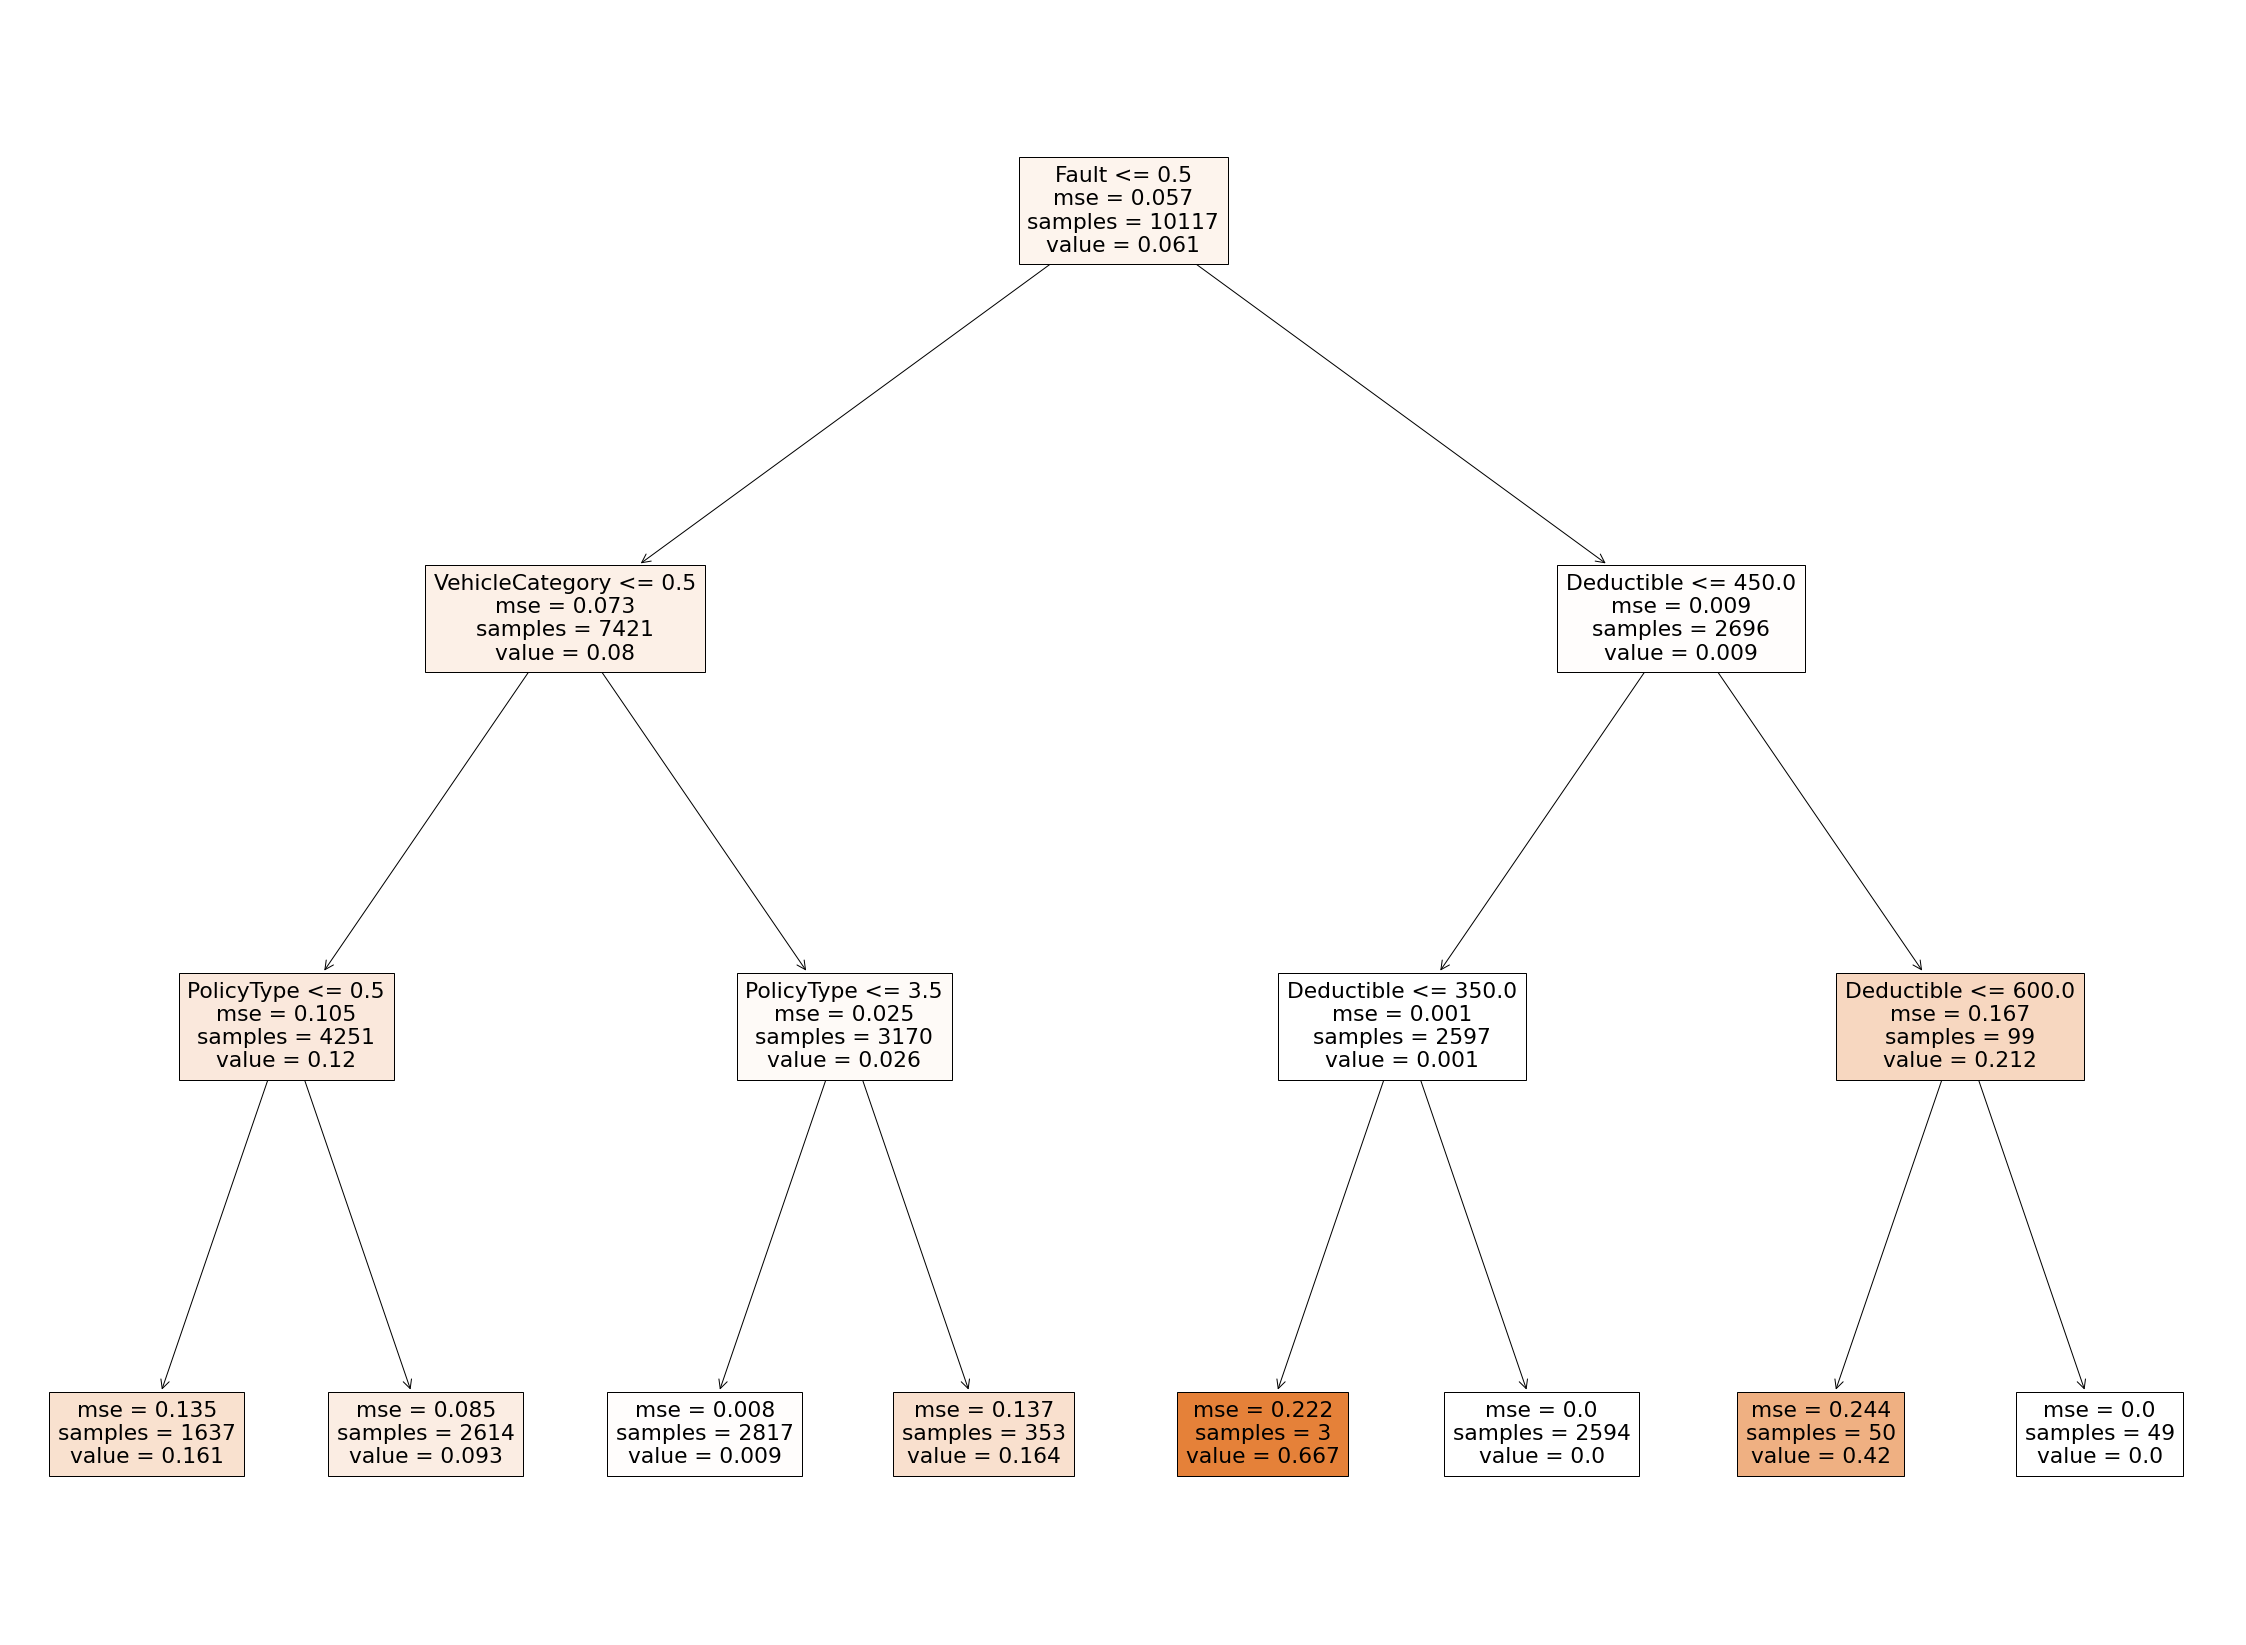

In [113]:
 pred = DecisionTreeRegressor(criterion = 'mse',max_depth=3, random_state=1)
pred = pred.fit(X_train,Y_train)
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(pred,filled=True, feature_names=X_train.columns,proportion=False)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


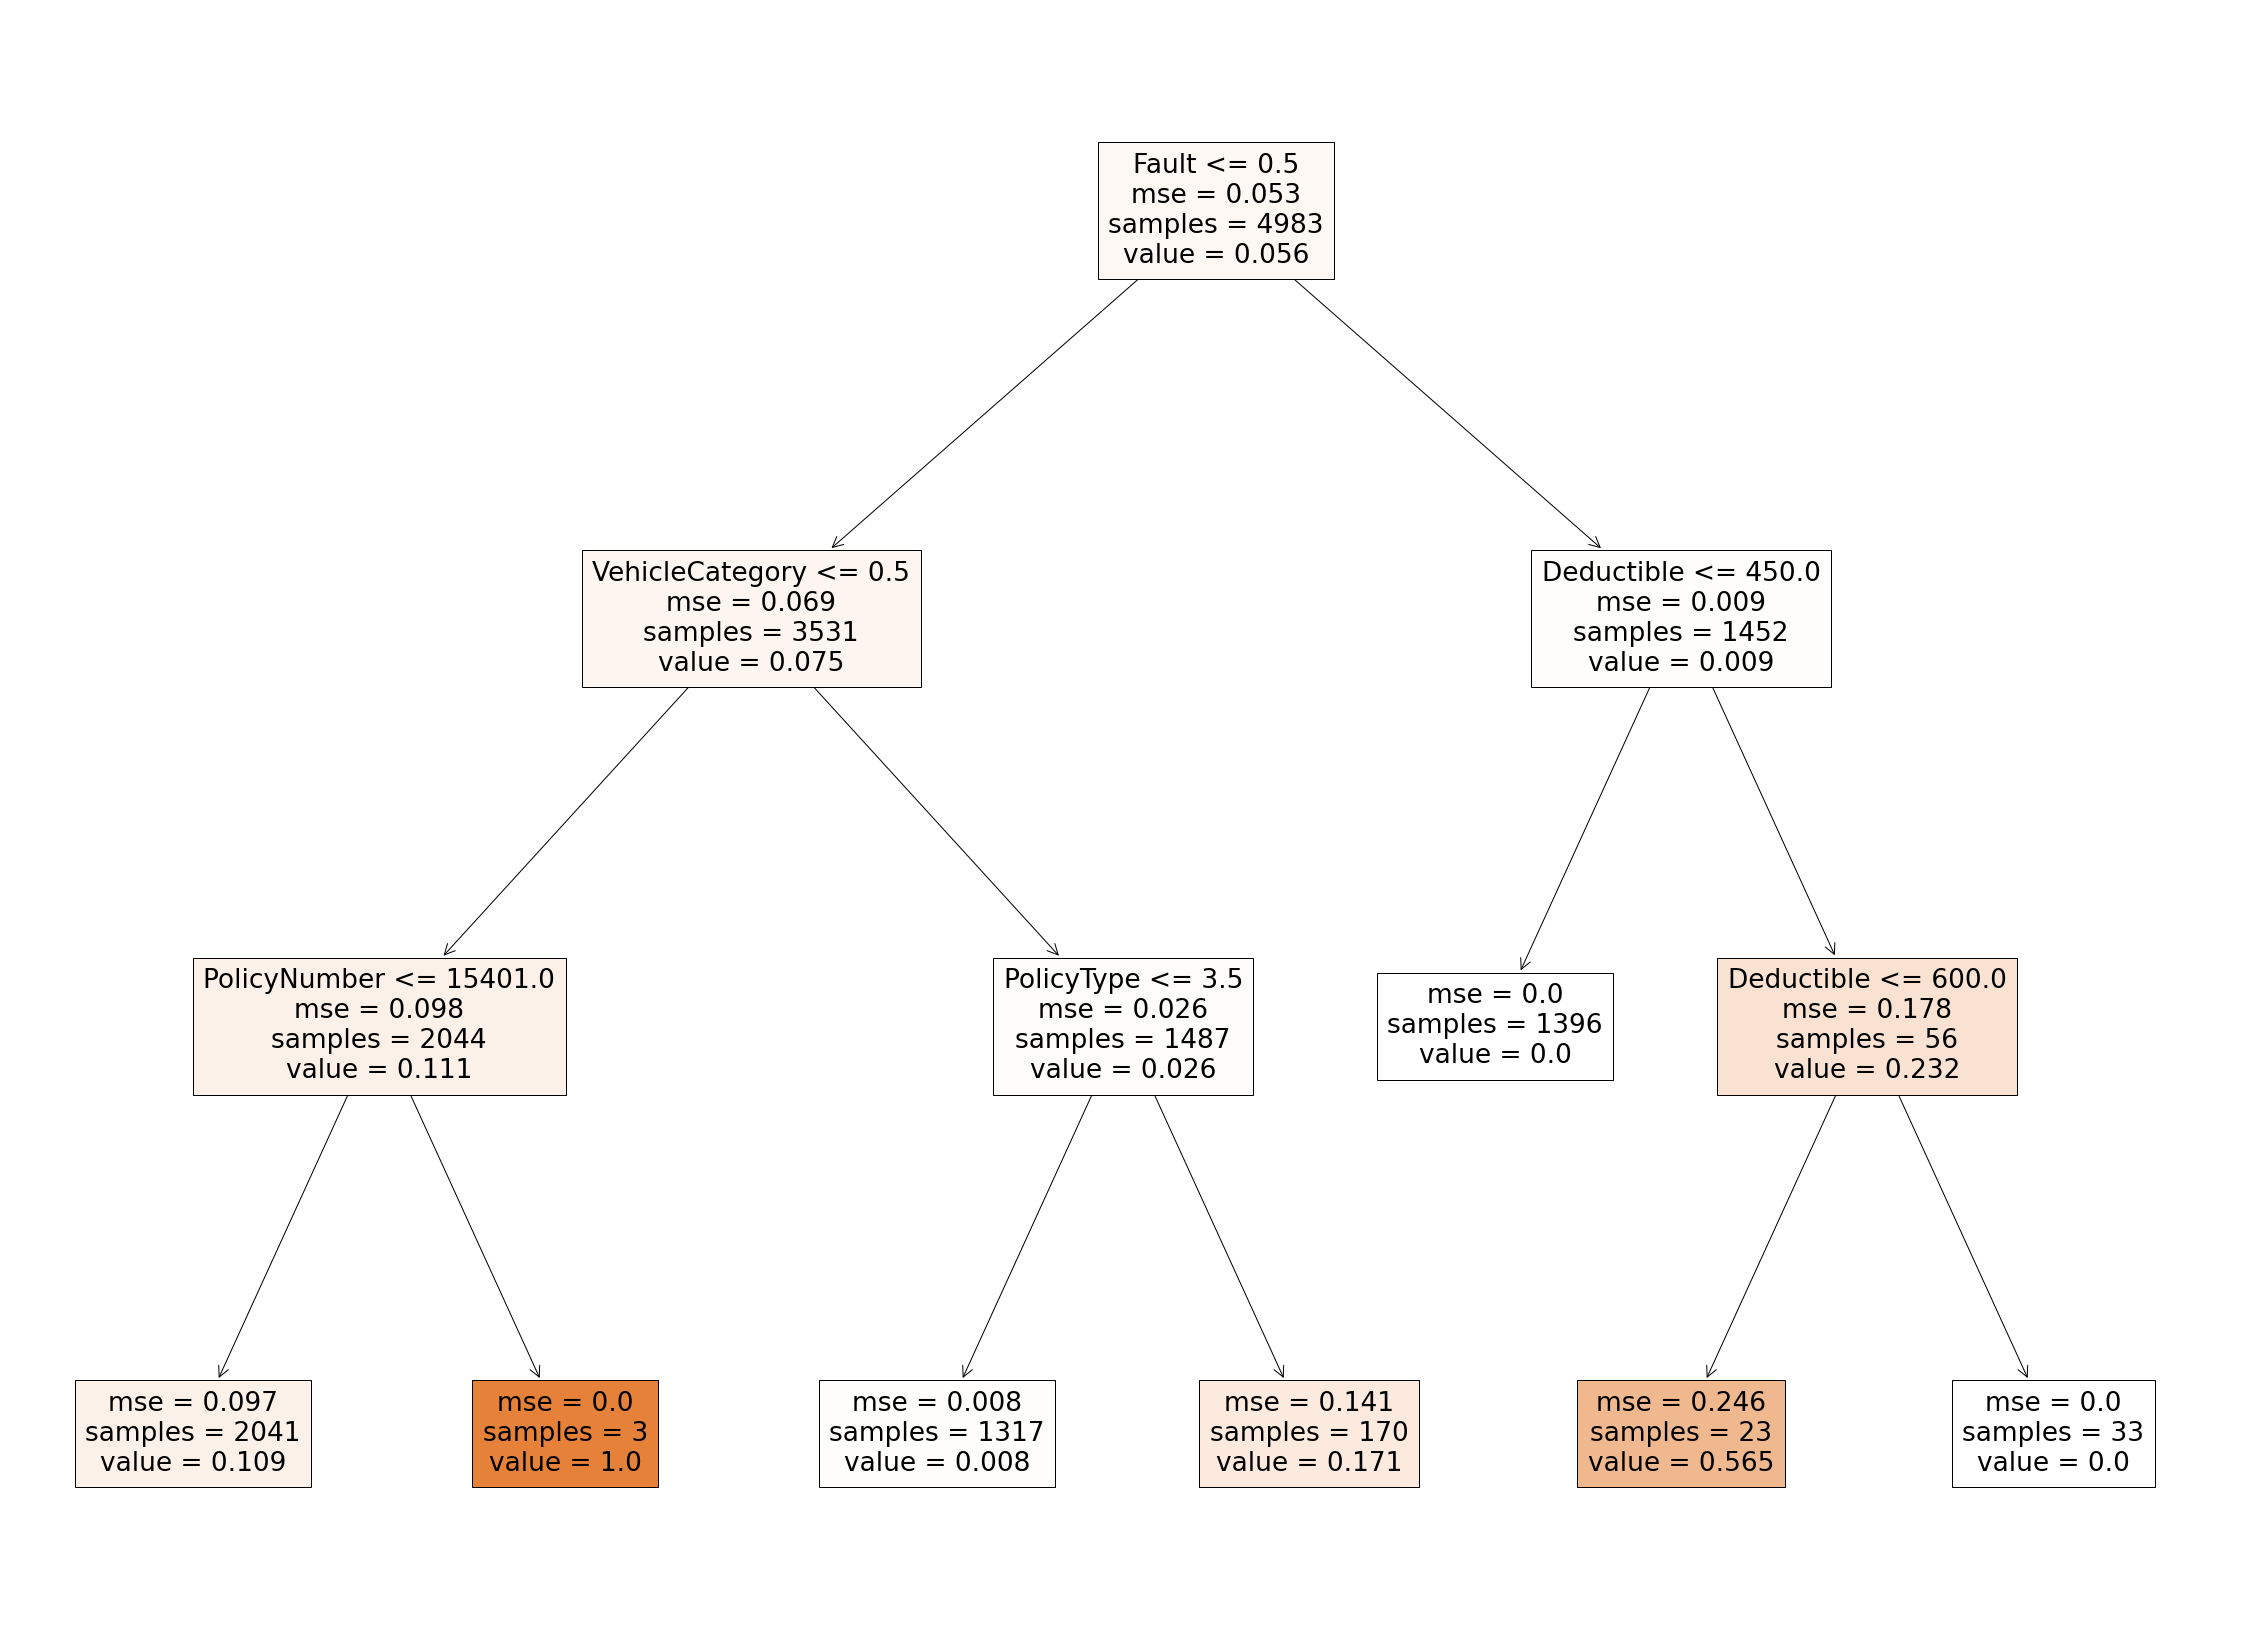

In [114]:
pred_test = DecisionTreeRegressor(criterion = 'mse',max_depth=3, random_state=1)
pred_test = pred.fit(X_test,Y_test)
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(pred_test,filled=True, feature_names=X_test.columns,proportion=False)
plt.show()

In [288]:
#trying decision tree regressor with only revelant categories

X_new= fraud_data[['VehicleCategory','PolicyType','Deductible','Fault']]



In [334]:
X_train_2, X_test_2, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.33, random_state=1)




,VehicleCategory,PolicyType,Deductible,Fault
5985,0.0,0.0,400.0,0.0
8210,0.0,1.0,700.0,1.0
13223,0.0,1.0,400.0,1.0
443,1.0,3.0,400.0,0.0
8114,1.0,3.0,400.0,0.0
...,...,...,...,...
905,0.0,0.0,400.0,0.0
5192,0.0,0.0,700.0,1.0
12172,0.0,1.0,400.0,1.0
235,0.0,1.0,400.0,0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


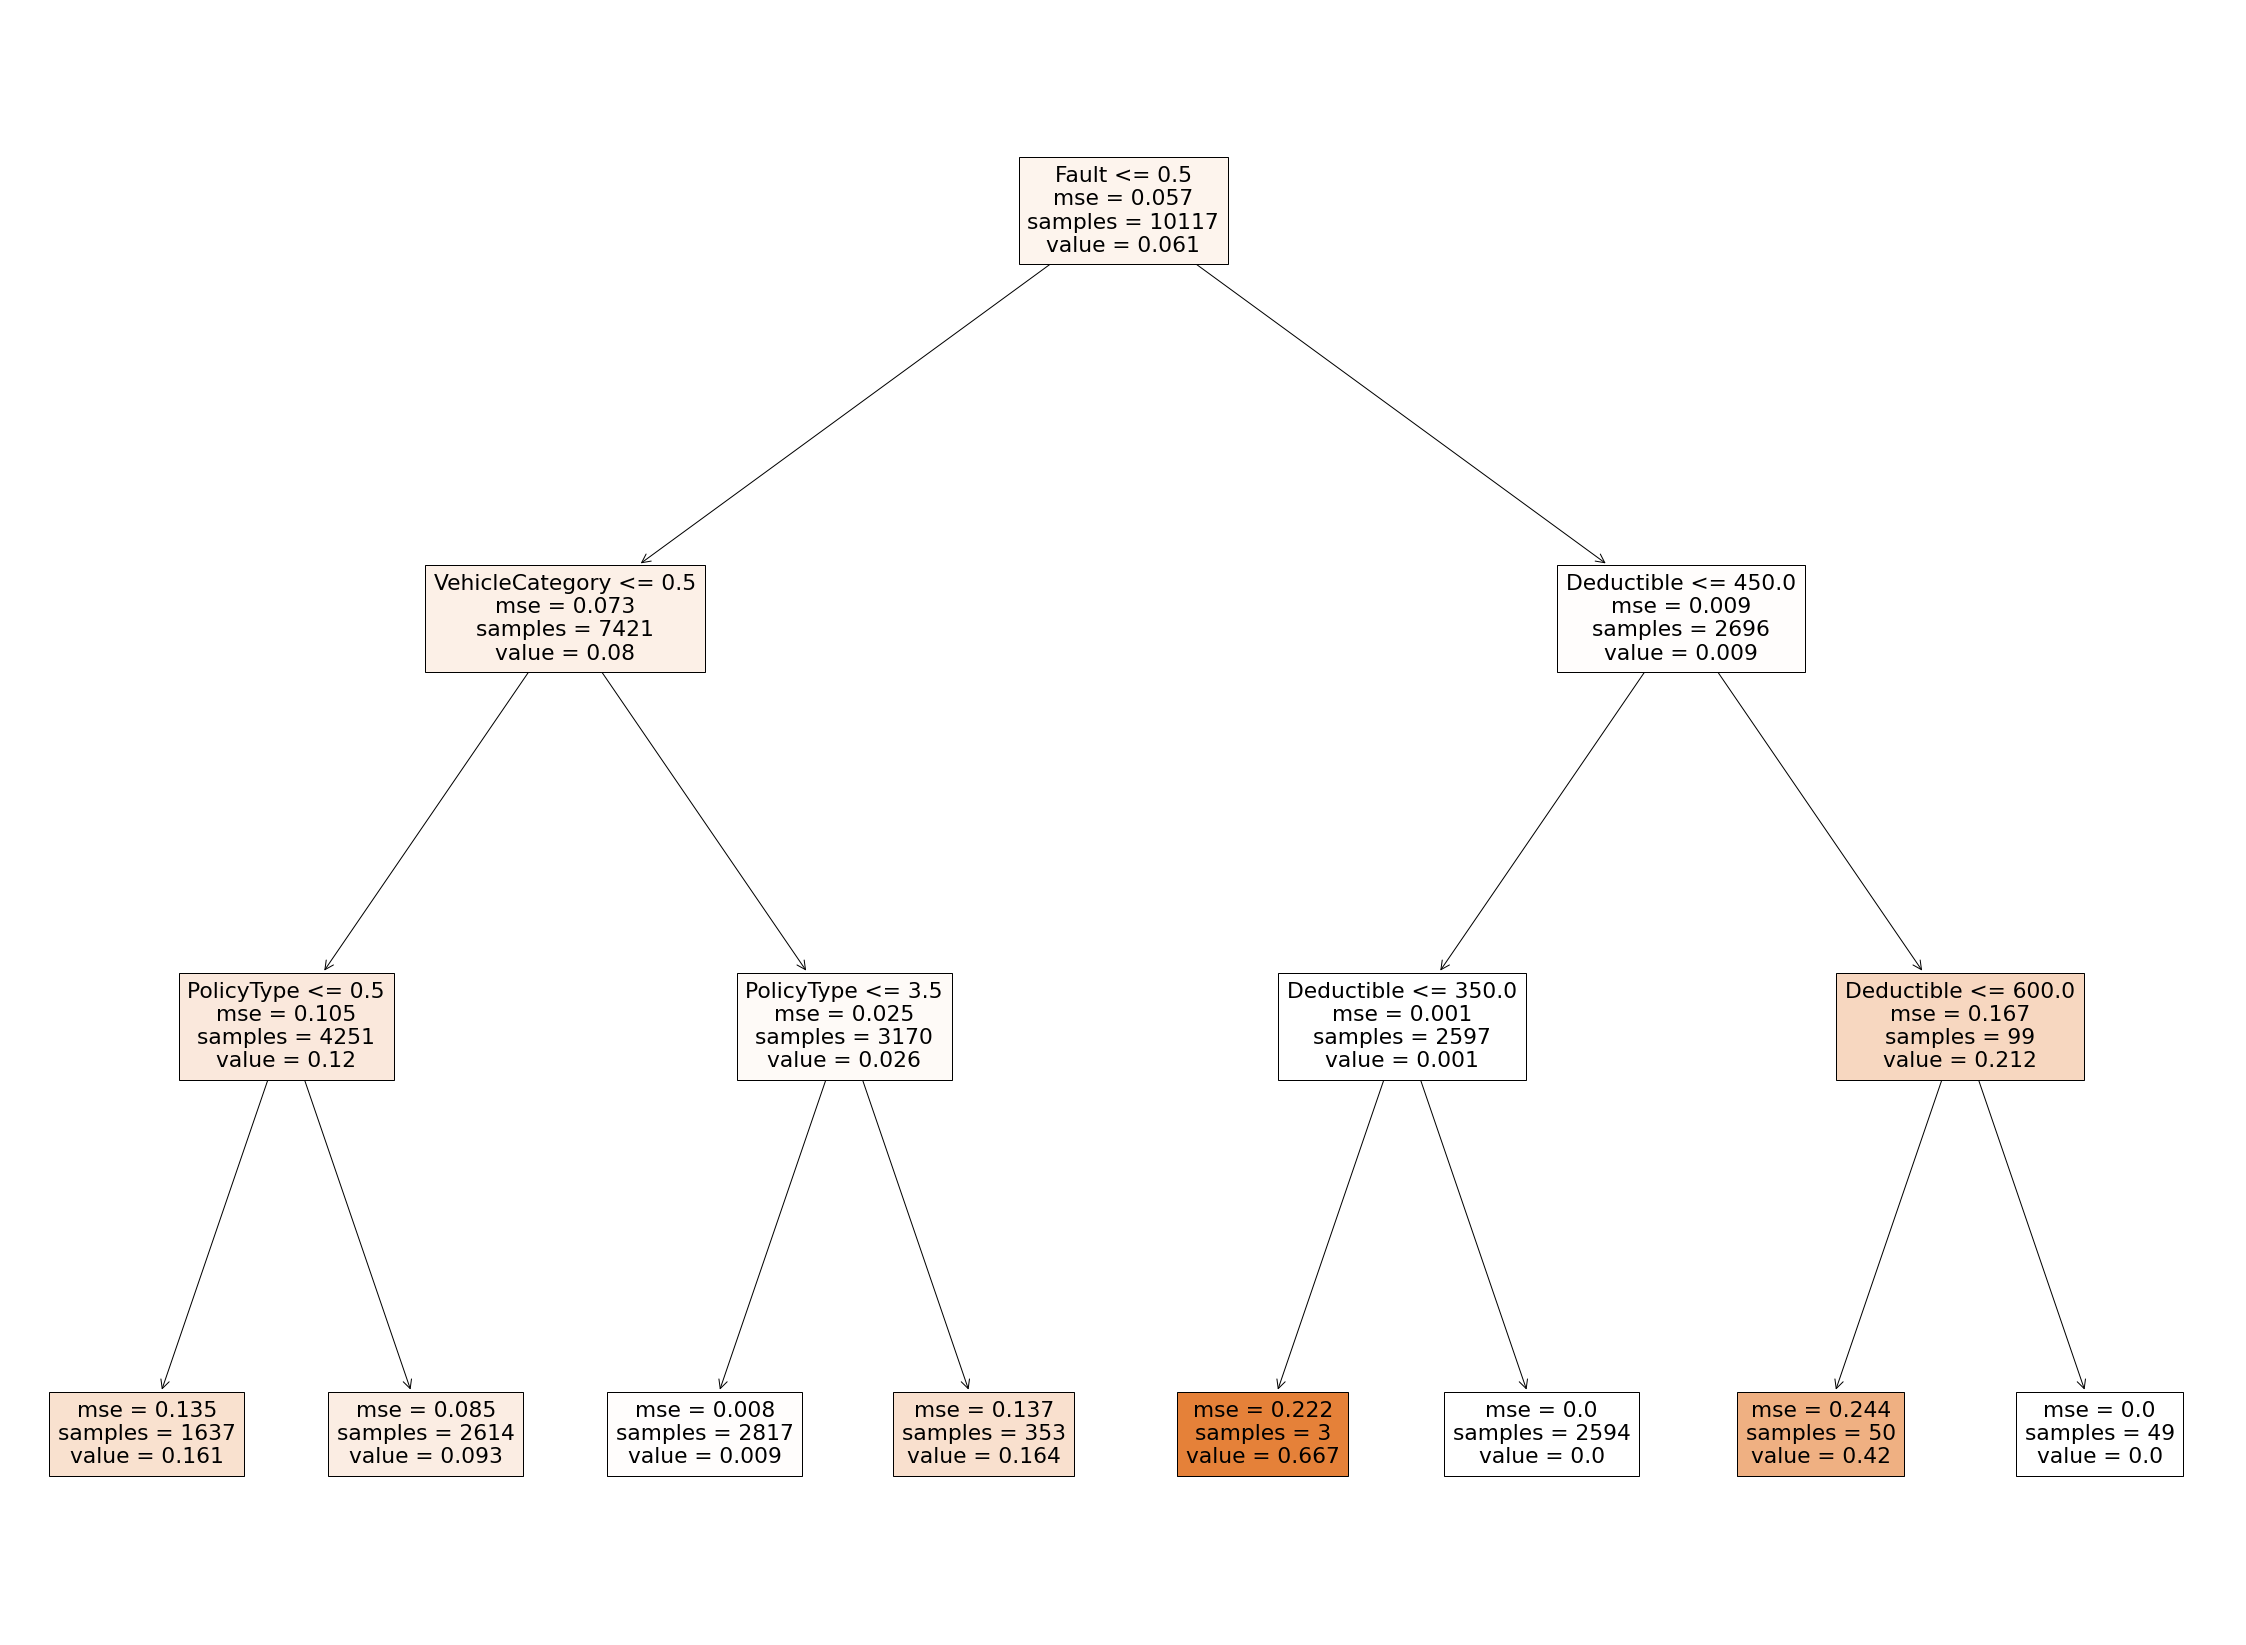

In [291]:
pred = DecisionTreeRegressor(criterion = 'mse',max_depth=3, random_state=1)
pred = pred.fit(X_train_2,Y_train)
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(pred,filled=True, feature_names=X_train_2.columns,proportion=False)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


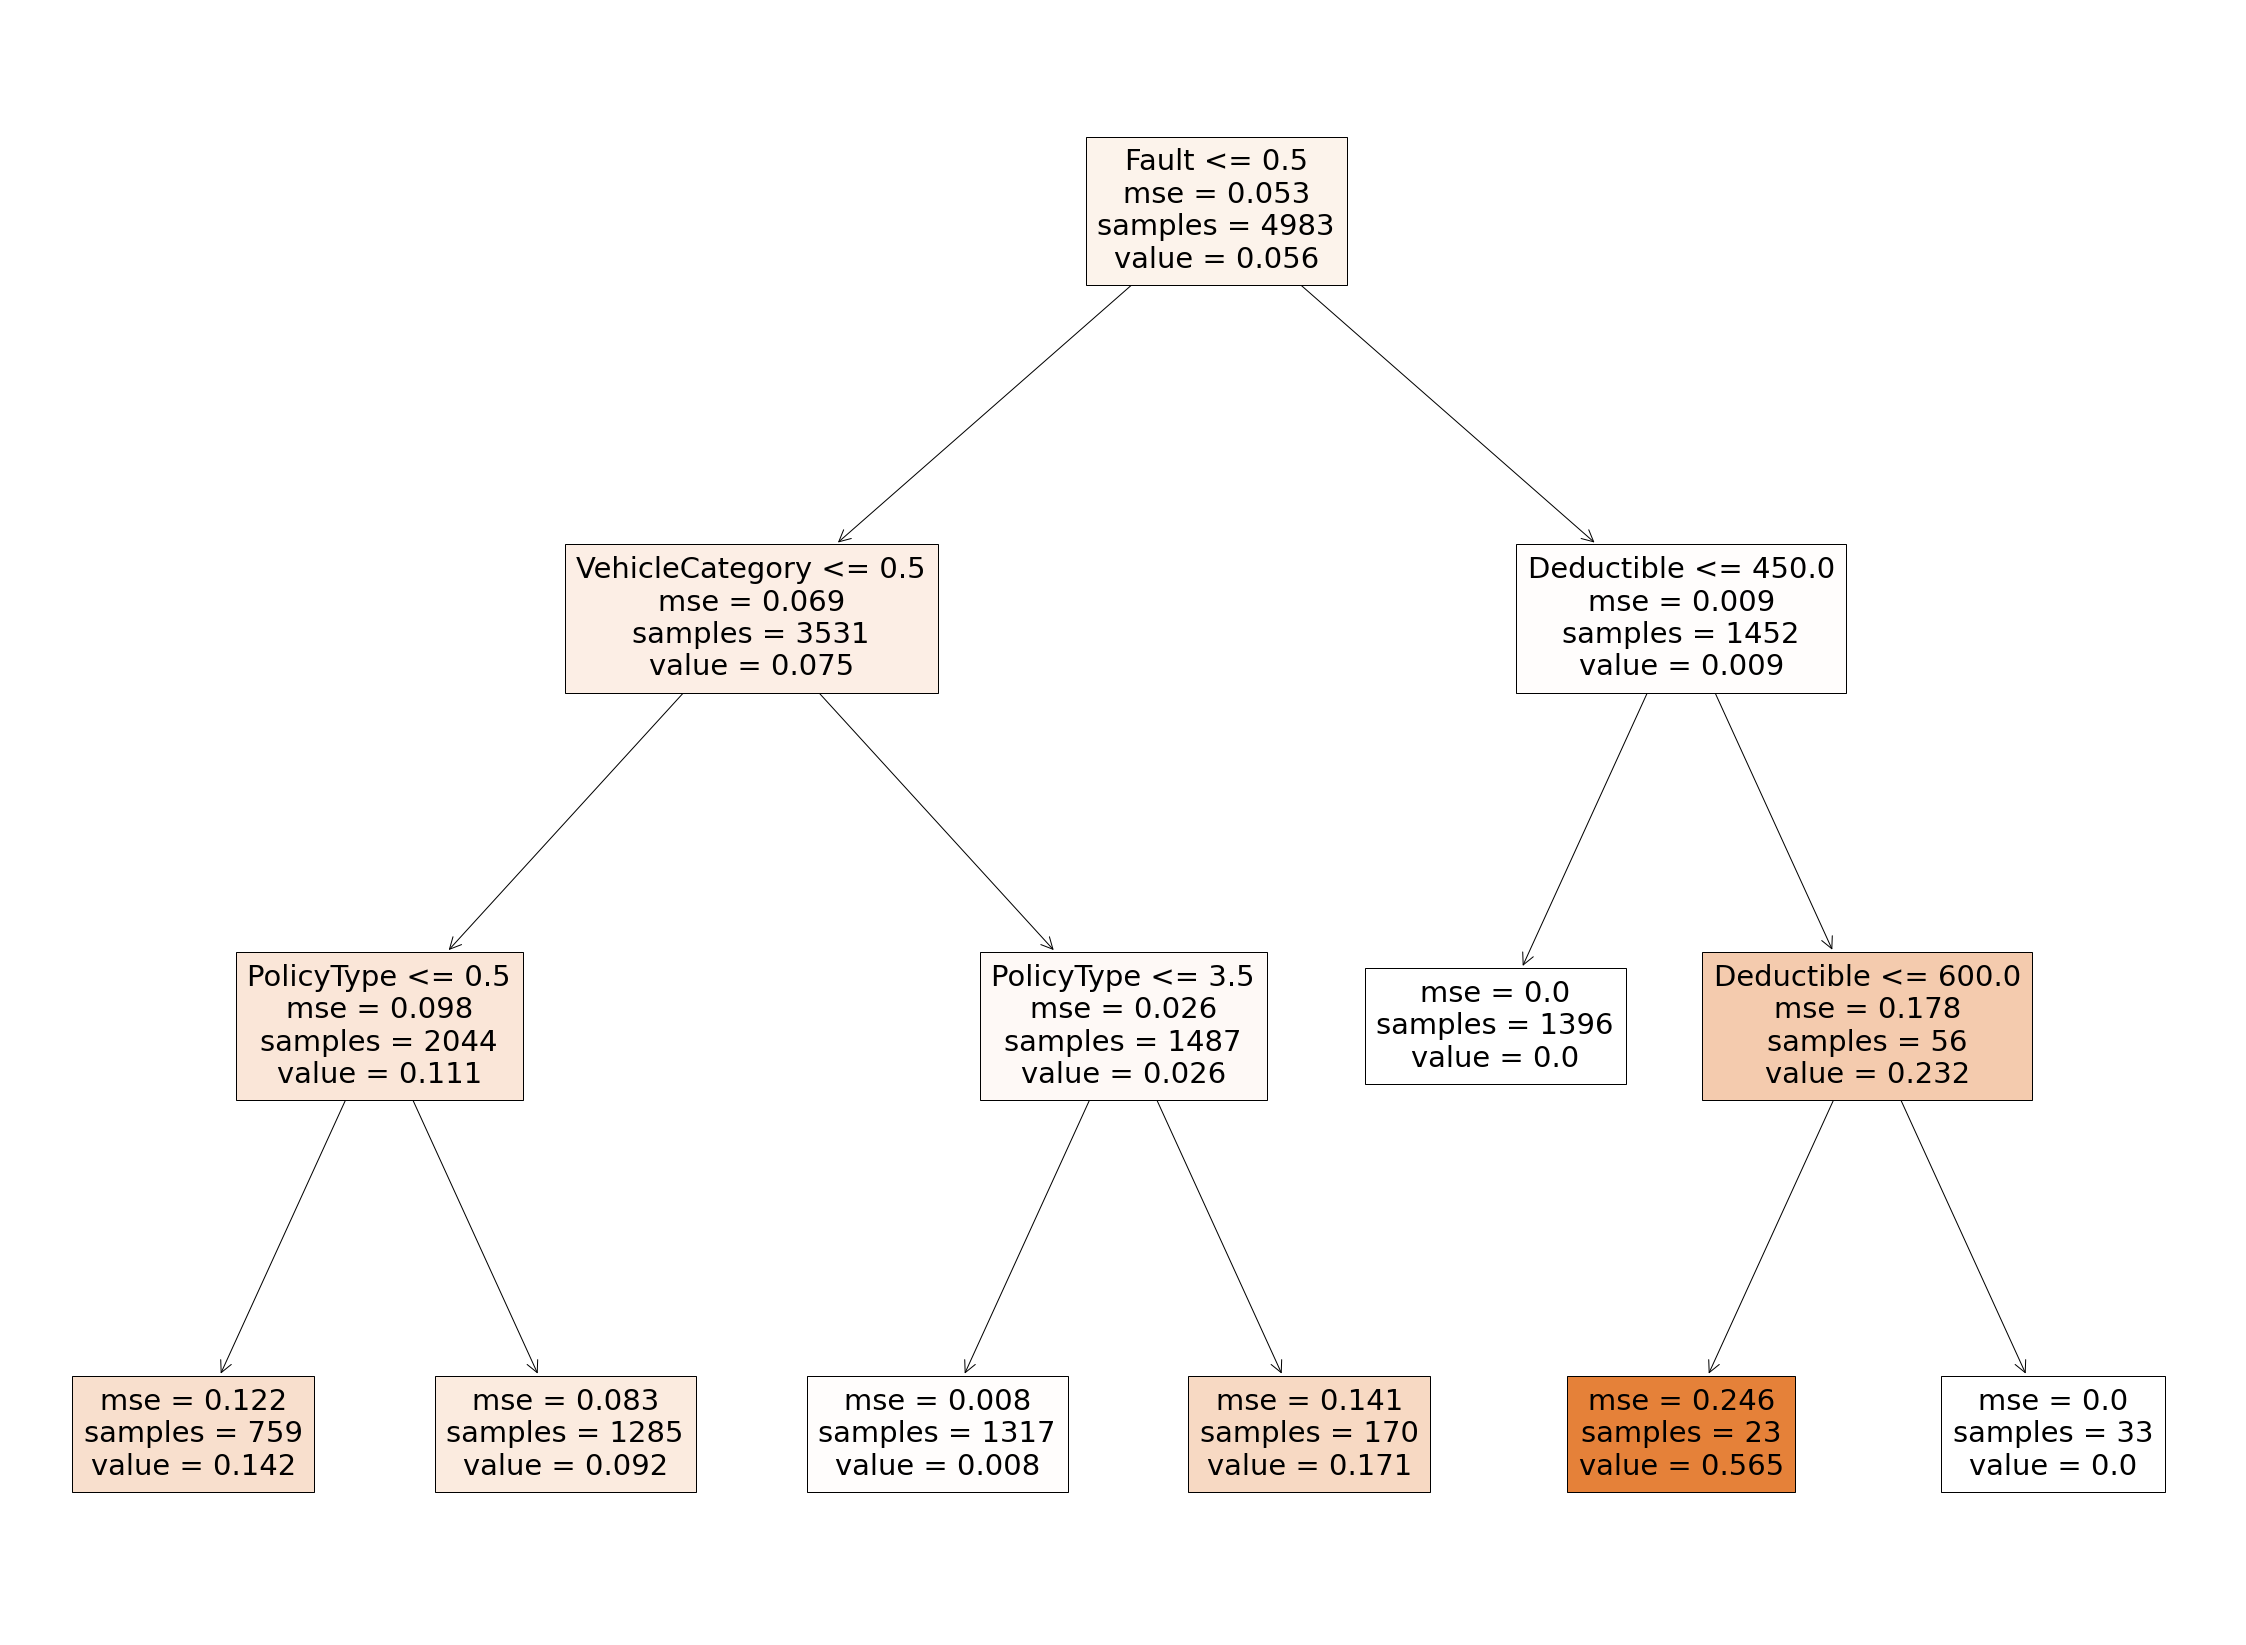

In [292]:
pred = DecisionTreeRegressor(criterion = 'mse',max_depth=3, random_state=1)
pred = pred.fit(X_test_2,Y_test)
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(pred,filled=True, feature_names=X_test_2.columns,proportion=False)
plt.show()

In [154]:
text_representation = export_text(pred_test)
print(text_representation)

|--- feature_11 <= 0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_15 <= 15401.00
|   |   |   |--- value: [0.11]
|   |   |--- feature_15 >  15401.00
|   |   |   |--- value: [1.00]
|   |--- feature_13 >  0.50
|   |   |--- feature_12 <= 3.50
|   |   |   |--- value: [0.01]
|   |   |--- feature_12 >  3.50
|   |   |   |--- value: [0.17]
|--- feature_11 >  0.50
|   |--- feature_17 <= 450.00
|   |   |--- value: [0.00]
|   |--- feature_17 >  450.00
|   |   |--- feature_17 <= 600.00
|   |   |   |--- value: [0.57]
|   |   |--- feature_17 >  600.00
|   |   |   |--- value: [0.00]



In [115]:
Y_pred_test=pred.predict(X_test)
mse= mean_squared_error(Y_pred_test,Y_test)
rmse=math.sqrt(mse)
print("rmse for test set")
print(rmse)

rmse for test set
0.218667340816027


In [152]:
text_representation = export_text(pred)
print(text_representation)

|--- feature_11 <= 0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_15 <= 15401.00
|   |   |   |--- value: [0.11]
|   |   |--- feature_15 >  15401.00
|   |   |   |--- value: [1.00]
|   |--- feature_13 >  0.50
|   |   |--- feature_12 <= 3.50
|   |   |   |--- value: [0.01]
|   |   |--- feature_12 >  3.50
|   |   |   |--- value: [0.17]
|--- feature_11 >  0.50
|   |--- feature_17 <= 450.00
|   |   |--- value: [0.00]
|   |--- feature_17 >  450.00
|   |   |--- feature_17 <= 600.00
|   |   |   |--- value: [0.57]
|   |   |--- feature_17 >  600.00
|   |   |   |--- value: [0.00]



In [298]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train,Y_train)



RandomForestClassifier(n_estimators=20)

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[4704,    1],
       [ 275,    3]])

In [136]:
model.score(X_test,Y_test)

0.9446116797110174

Text(69.0, 0.5, 'Truth')

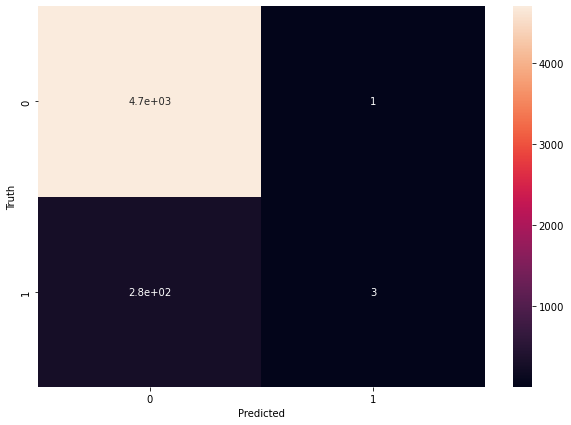

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [299]:
#Trying Random Forest with only relevant data
#Putting some code here to remind myself 
#X_new= fraud_data[['VehicleCategory','PolicyType','Deductible','Fault']]
#X_train_2, X_test_2, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.33, random_state=1)

model.fit(X_train_2,Y_train)

RandomForestClassifier(n_estimators=20)

In [300]:
model.score(X_train_2,Y_train)
#OK, accuracy went down....

0.9400019768706138

In [304]:
Y_predicted = model.predict(X_test_2)

In [306]:
com = confusion_matrix(Y_test,Y_predicted)
com

array([[4701,    4],
       [ 273,    5]])

Text(69.0, 0.5, 'Truth')

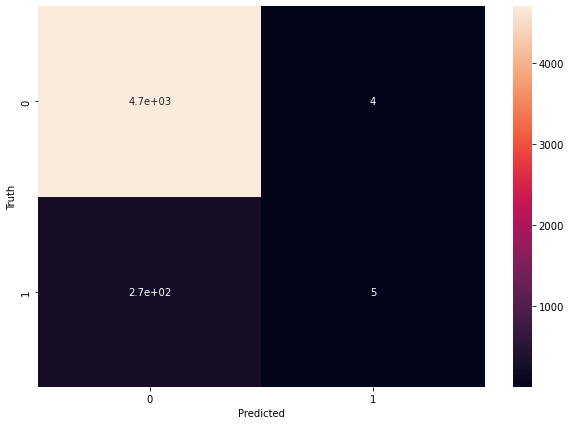

In [307]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(com,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [155]:
#Logistic Regression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.linear_model import LogisticRegression

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [205]:
X_test=(X_test-X_train.mean()/X_train.std())

X_train=(X_train-X_train.mean()/X_train.std())


In [206]:
lgstc_reg = LogisticRegression(penalty="none",solver = "newton-cg")
lgstc_reg.fit(X_train,Y_train)
print(lgstc_reg.intercept_, lgstc_reg.coef_)

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[2.85561405e-09] [[-3.08321765e-02 -4.24404212e-02 -6.22595134e-03 -4.11967805e-02
  -3.82566581e-01  3.24847662e-02 -3.00466021e-03 -5.95391389e-03
   3.73076365e-01  1.26326989e-01 -1.61017590e-02 -1.89973849e+00
  -4.11420896e-01 -5.22992018e-02  1.64247887e-01  1.68451715e-05
  -1.08537368e-03  1.69096988e-03  1.05635858e-02 -9.54441289e-02
  -1.17407254e-04  5.56937714e-03  2.52018362e-02  2.78241141e-03
   1.05609284e-02  1.19753771e-02 -2.37835182e-02  3.04835494e-03
   2.65880214e-02 -8.11982717e-02 -2.09872128e-01 -4.51049990e-05]]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [207]:

Y_train_pred=lgstc_reg.predict_proba(X_train)

Y_test_pred=lgstc_reg.predict_proba(X_test)

mle_vector_train = np.log(np.where(Y_train == 1,Y_train_pred[:,1],Y_train_pred[:,0]))

mle_vector_test = np.log(np.where(Y_test == 1, Y_test_pred[:,1], Y_test_pred[:,0]))

cost_function_training = np.negative(np.sum(mle_vector_train/len(Y_train)))

cost_function_test = np.negative(np.sum(mle_vector_test)/len(Y_test))  
                                   
                                   
print('cost function training set = ' ,cost_function_training)

print ('cost function test set = ', cost_function_test)


cost function training set =  0.20257176126069154
cost function test set =  0.19801306099618593


In [410]:
logisticRegr = LogisticRegression()
X_test=(X_test-X_train.mean()/X_train.std())

X_train=(X_train-X_train.mean()/X_train.std())



In [411]:
logisticRegr.fit(X_train, Y_train)

LogisticRegression()

In [412]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)
predictions


0.9442103150712422


array([0., 0., 0., ..., 0., 0., 0.])

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [414]:
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[4705    0]
 [ 278    0]]


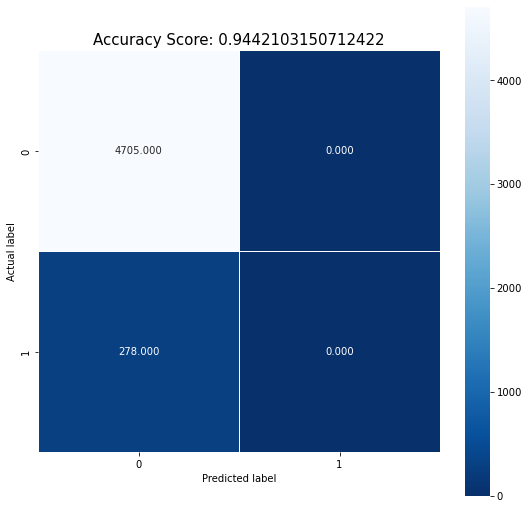

In [415]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [416]:
#Doing Logistics Regression again to calculate ROC curve and get better threshold
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [417]:
lr_auc = roc_auc_score(Y_test, lr_probs)

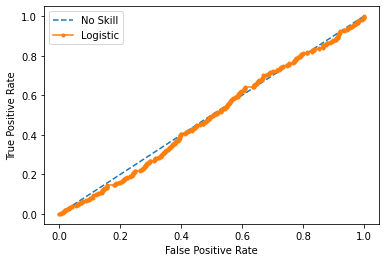

In [418]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
# predict probabilities
Y_hat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
Y_hat = Y_hat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, Y_hat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [419]:
#finding the threshold in order to change my predictions 
from numpy import sqrt
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.059127, G-Mean=0.502


[[2023 2682]
 [ 116  162]]


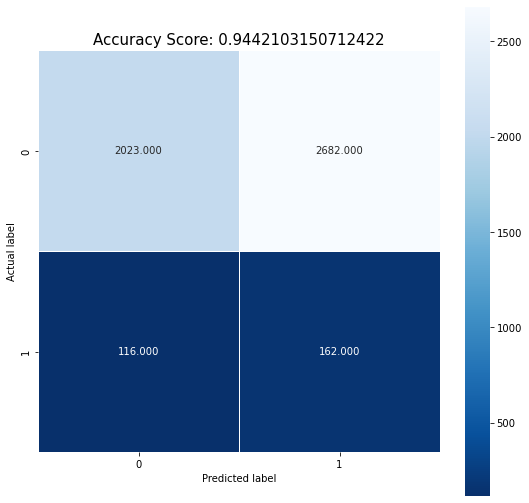

In [428]:
#implementing logistic regression with better threshold

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
# predict probabilities
Y_hat = model.predict_proba(X_test)
# apply threhold to Y_hat
b = np.where(Y_hat > 0.059127, 1, Y_hat)
c=np.where(b  <= 0.059127,0,b)
c = c[:, 1]
c

dom = metrics.confusion_matrix(Y_test, c)
print(dom)
plt.figure(figsize=(9,9))
sns.heatmap(dom, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [421]:
#Doing Logistic Regression Again with modified dataset and applying new  optimal threshold
X_test_2=(X_test_2-X_train_2.mean()/X_train_2.std())

X_train_2=(X_train_2-X_train_2.mean()/X_train_2.std())

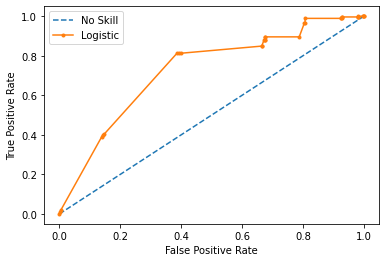

In [422]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_2, Y_train)
# predict probabilities
Y_hat = model.predict_proba(X_test_2)
# keep probabilities for the positive outcome only
Y_hat = Y_hat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, Y_hat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [429]:
#finding the threshold in order to change my predictions 
from numpy import sqrt
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.086571, G-Mean=0.706


In [490]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_2, Y_train)
# predict probabilities
Y_hat = model.predict_proba(X_test_2)
# apply threhold to Y_hat
b = np.where(Y_hat > 0.086570, 1, Y_hat)
c=np.where(b  <= 0.086570,0,b)
c = c[:, 1]
c



array([[0.96004649, 0.03995351],
       [0.99170054, 0.00829946],
       [0.9134291 , 0.0865709 ],
       ...,
       [0.9134291 , 0.0865709 ],
       [0.98589759, 0.01410241],
       [0.85546662, 0.14453338]])

In [491]:
jom = metrics.confusion_matrix(Y_test, c)
print(jom)


[[2887 1818]
 [  52  226]]


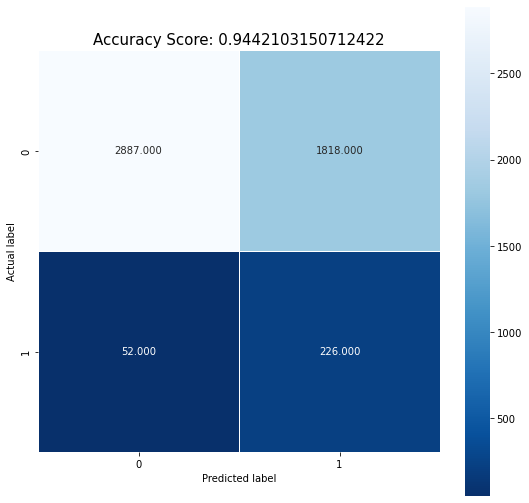

In [492]:
plt.figure(figsize=(9,9))
sns.heatmap(jom, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [479]:
#Writing some code here in order to compute cost function in next cell

b = np.where(Y_hat > 0.086570, 1, Y_hat)
y_test_pred=np.where(b  <= 0.086570,0,b)
y_test_pred


array([[1., 0.],
       [1., 0.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 0.],
       [1., 1.]])

In [461]:
Y_train_pred=lgstc_reg.predict_proba(X_train_2)

y_test_pred=lgstc_reg.predict_proba(X_test_2)

mle_vector_train = np.log(np.where(Y_train == 1,Y_train_pred[:,1],Y_train_pred[:,0]))

mle_vector_test = np.log(np.where(Y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

cost_function_training = np.negative(np.sum(mle_vector_train/len(Y_train)))

cost_function_test = np.negative(np.sum(mle_vector_test)/len(Y_test))  
                                   
                                   
print('cost function training set = ' ,cost_function_training)

print ('cost function test set = ', cost_function_test)


cost function training set =  0.20756309073344958
cost function test set =  0.19820254290404488


In [507]:
#Doing Logistic Regressoin again after deleting Vehicle Category as dimension. Then doing again after deleting
#Polcy Type as Dimension.This is only for comparison.

X_new = fraud_data[['Deductible','Fault']]
X_train_2, X_test_2, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.33, random_state=1)
X_test_2=(X_test_2-X_train_2.mean()/X_train_2.std())

X_train_2=(X_train_2-X_train_2.mean()/X_train_2.std())


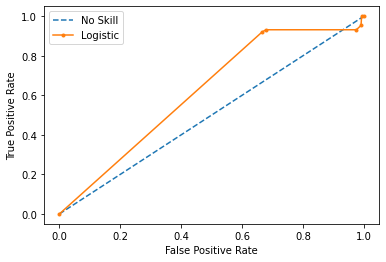

In [508]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_2, Y_train)
# predict probabilities
Y_hat = model.predict_proba(X_test_2)
# keep probabilities for the positive outcome only
Y_hat = Y_hat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, Y_hat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [510]:
from numpy import sqrt
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.082531, G-Mean=0.554


In [511]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_2, Y_train)
# predict probabilities
Y_hat = model.predict_proba(X_test_2)
# apply threhold to Y_hat
b = np.where(Y_hat > 0.082531, 1, Y_hat)
c=np.where(b  <= 0.082531,0,b)
c = c[:, 1]
c

array([1., 0., 1., ..., 1., 1., 1.])

In [512]:
jom = metrics.confusion_matrix(Y_test, c)
print(jom)


[[1570 3135]
 [  22  256]]


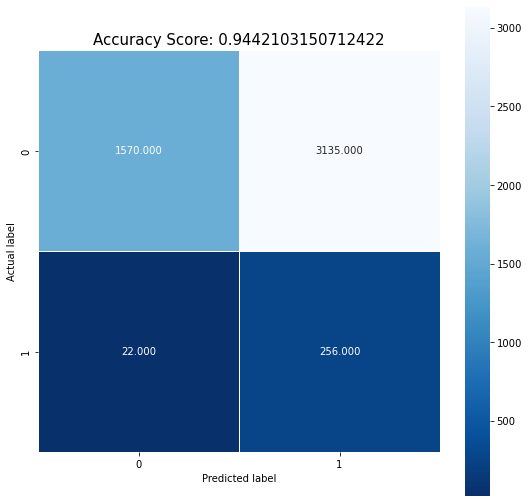

In [513]:
plt.figure(figsize=(9,9))
sns.heatmap(jom, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);